# Assignment 2

# Ali Soliman
## 28-13627

## I. MLP

### Import Statements

In [17]:
import pylab
from numpy import *
import pandas as pd
import sklearn
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np
import mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import ShuffleSplit

### Reading data from the dataset files

1. Load data from the training set, We will take only 20000 dataframe.
2. Reshape the representation of each image to a 1D Array to feed it to our MLP
3. Load data from the testing set to start testing right after training the machine.


In [7]:
images, labels = mnist.load_mnist('training',selection=slice(0, 20000))
images = images.reshape(len(images),-1)

testing_images, testing_labels = mnist.load_mnist('testing',selection=slice(0, 5000))
testing_images = testing_images.reshape(len(testing_images),-1)

In [7]:
pca = PCA(n_components=40)
pca_images = pca.fit_transform(images)

pca_testing_images = pca.fit_transform(testing_images)
print(pca_images.shape)
print(pca_testing_images.shape)

(20000, 40)
(5000, 40)


### Testing MLP Classifier with 1 hidden node and Printing out the error score with respect to the testing sets

In [3]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=1)
mlp_classifier = OneVsRestClassifier(mlp_classifier)
mlp_classifier.fit(images,labels)
print(mlp_classifier.score(testing_images,testing_labels))

0.4706


Using only 1 node will make it much harder for the machine to classify between different types of digits provided. Therefore, As we can see the accuracy value is very low.

### Plot number of layers with respect to its corresponding accuracy value achieved.

* Initialising layers_x_axis and layers_y_axis for plotting
    * layers_x_axis will represent the number of hidden layers used in our MLP
    * layers_y_axis will represent the accuracy level with respect to the number of used hidden nodes

In [4]:
layers_x_axis = range(1,97,5)
layers_y_axis = []
layers = np.array([5])
print(layers_x_axis)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96]


Every Iteration 5 layers will be added to the MLP each one of these layers will consist of 5 hidden nodes

In [5]:
for i in range(1,97,5):
    mlp_classifier = MLPClassifier(hidden_layer_sizes=layers)
    mlp_classifier = OneVsRestClassifier(mlp_classifier)
    mlp_classifier.fit(images,labels)
    layers_y_axis.append(mlp_classifier.score(testing_images,testing_labels))
    layers = np.concatenate((layers,[5,5,5,5,5]))
print(layers_x_axis)
print(layers_y_axis)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96]
[0.93640000000000001, 0.89900000000000002, 0.80820000000000003, 0.20619999999999999, 0.48859999999999998, 0.3004, 0.2122, 0.1142, 0.1142, 0.1142, 0.1142, 0.1142, 0.1142, 0.1142, 0.1142, 0.1142, 0.1142, 0.1142, 0.1142, 0.1142]


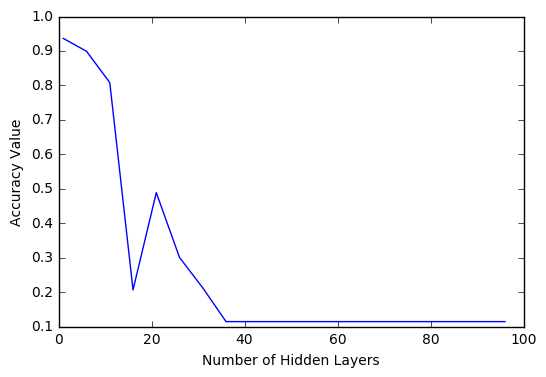

In [6]:
pylab.xlabel("Number of Hidden Layers")
pylab.ylabel("Accuracy Value")
pylab.plot(layers_x_axis,layers_y_axis)
pylab.show()

Due to the largely increasing number of hidden layers, Overfitting occured which lead into increasing false detection for the testing data with the increase of the hidden layers.

# Start Plot

* Initialising nodes_x_axis and nodes_y_axis for plotting
    * nodes_x_axis will represent the number of hidden nodes used in our MLP
    * nodes_y_axis will represent the accuracy level with respect to the number of used hidden nodes

In [7]:
nodes_x_axis = range(1,97,5)
nodes_y_axis = []
print(nodes_x_axis)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96]


In [8]:
for i in range(1,97,5):
    mlp_classifier = MLPClassifier(hidden_layer_sizes=i)
    mlp_classifier = OneVsRestClassifier(mlp_classifier)
    mlp_classifier.fit(images,labels)
    nodes_y_axis.append(mlp_classifier.score(testing_images,testing_labels))
print(nodes_x_axis)
print(nodes_y_axis)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96]
[0.62480000000000002, 0.93820000000000003, 0.95279999999999998, 0.95879999999999999, 0.95699999999999996, 0.95860000000000001, 0.95999999999999996, 0.96319999999999995, 0.96399999999999997, 0.96360000000000001, 0.96299999999999997, 0.96240000000000003, 0.96360000000000001, 0.96340000000000003, 0.96619999999999995, 0.96440000000000003, 0.96540000000000004, 0.96519999999999995, 0.96440000000000003, 0.96340000000000003]


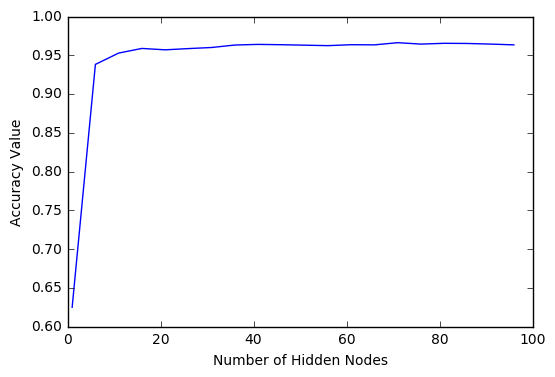

In [9]:
pylab.xlabel("Number of Hidden Nodes")
pylab.ylabel("Accuracy Value")
pylab.plot(nodes_x_axis,nodes_y_axis)
pylab.show()

# Plotting Different Activation Functions

In [10]:
activation =  ['identity', 'logistic', 'tanh', 'relu']

for i in activation:
    mlp_classifier = MLPClassifier(activation=i)
    mlp_classifier = OneVsRestClassifier(mlp_classifier)
    mlp_classifier.fit(images,labels)
    print(i,mlp_classifier.score(testing_images,testing_labels))

('identity', 0.88819999999999999)
('logistic', 0.95920000000000005)
('tanh', 0.96240000000000003)
('relu', 0.96360000000000001)


# Plotting Different Learning Rates

In [11]:
learning_rates =  ['constant', 'invscaling', 'adaptive']

for i in learning_rates:
    mlp_classifier = MLPClassifier(learning_rate=i)
    mlp_classifier = OneVsRestClassifier(mlp_classifier)
    mlp_classifier.fit(images,labels)
    print(i,mlp_classifier.score(testing_images,testing_labels))

('constant', 0.96779999999999999)
('invscaling', 0.96440000000000003)
('adaptive', 0.96560000000000001)


# Plotting Different Momentums

In [22]:
momentum_x_axis = []
momentum_y_axis = []

In [23]:
for i in np.linspace(0, 1, num=20):
    mlp_classifier = MLPClassifier(solver = 'sgd', momentum=i)
    mlp_classifier = OneVsRestClassifier(mlp_classifier)
    mlp_classifier.fit(images,labels)
    momentum_x_axis.append(i)
    momentum_y_axis.append(mlp_classifier.score(testing_images,testing_labels))

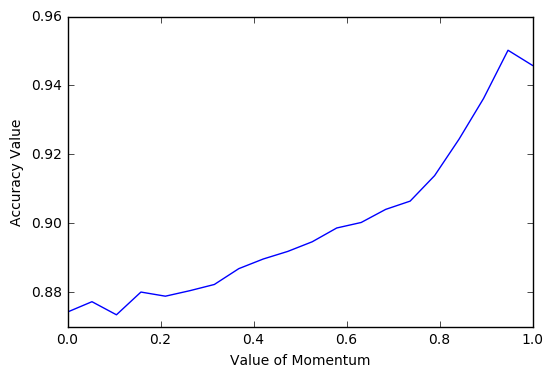

In [24]:
pylab.xlabel("Value of Momentum")
pylab.ylabel("Accuracy Value")
pylab.plot(momentum_x_axis,momentum_y_axis)
pylab.show()

# Accuracy Level on different Training Styles

1. Starting with sequential data entry
2. Next with the whole data set as entry
3. Next with mini batches of the whole data set as entry

In [11]:
batch_sizes =  [1, 20000, 'auto']

for i in batch_sizes:
    mlp_classifier = MLPClassifier(batch_size=i)
    mlp_classifier = OneVsRestClassifier(mlp_classifier)
    mlp_classifier.fit(images,labels)
    print(i,mlp_classifier.score(testing_images,testing_labels))

(1, 0.95020000000000004)


/Users/Ali/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


(20000, 0.78879999999999995)
('auto', 0.96440000000000003)


## II. SVM

Plotting tradeoff parameter C with respect to the Accuracy Value in a OneVsRest SVM

In [9]:
c_x_axis = []
c_y_axis = []

In [10]:
for i in np.linspace(0.5, 50, num=10):
    svm = sklearn.svm.SVC(C=i)
    svm = OneVsRestClassifier(svm)
    svm.fit(images,labels)
    c_x_axis.append(i)
    c_y_axis.append(svm.score(testing_images,testing_labels))

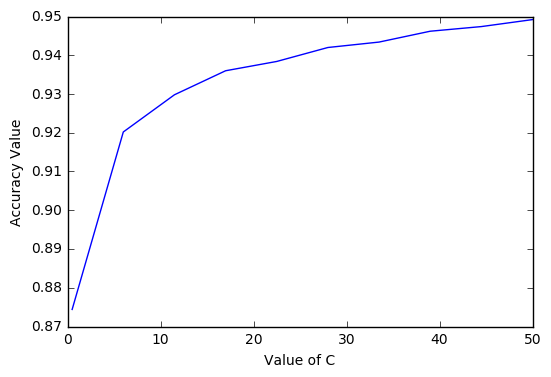

In [12]:
pylab.xlabel("Value of C")
pylab.ylabel("Accuracy Value")
pylab.plot(c_x_axis,c_y_axis)
pylab.show()

### Plotting C Value with respect to the Accuracy Value in a OneVsOne SVM

In [14]:
one_c_x_axis = []
one_c_y_axis = []

In [15]:
for i in np.linspace(0.5, 50, num=10):
    svm = sklearn.svm.SVC(C=i)
    svm.fit(images,labels)
    one_c_x_axis.append(i)
    one_c_y_axis.append(svm.score(testing_images,testing_labels))

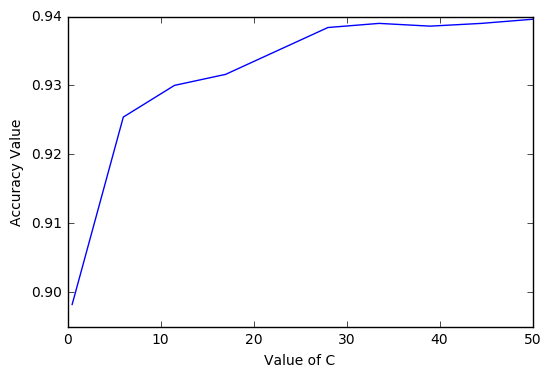

In [21]:
pylab.xlabel("Value of C")
pylab.ylabel("Accuracy Value")
pylab.plot(one_c_x_axis,one_c_y_axis)
pylab.show()

### Testing Different Kernel Functions in a OneVsRest SVM

In [20]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid'] 
for i in kernels:
    svm = sklearn.svm.SVC(kernel=i)
    svm = OneVsRestClassifier(svm)
    svm.fit(images,labels)
    print(svm.score(testing_images,testing_labels))

0.8854
0.8438
0.8872
0.8602


### Testing Different Kernel Functions in a OneVsOne SVM

In [19]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid'] 
for i in kernels:
    svm = sklearn.svm.SVC(kernel=i)
    svm.fit(images,labels)
    print(svm.score(testing_images,testing_labels))

0.9016
0.1918
0.908
0.8934


## III. Early Stopping Plots

In [22]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

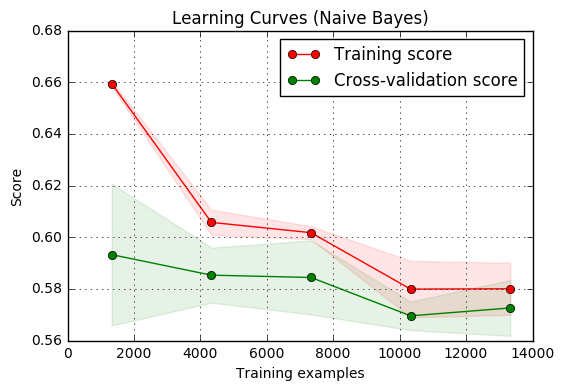

In [38]:
title = "Learning Curves (Naive Bayes)"
estimator = GaussianNB()
plot_learning_curve(estimator,title,images,labels)
plt.show()

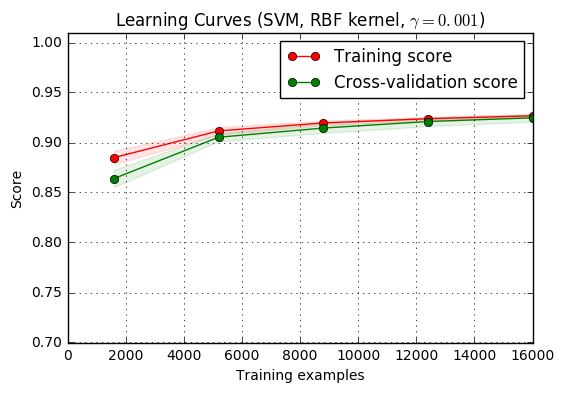

In [35]:
title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, images, labels, (0.7, 1.01), cv=cv)

plt.show()

## IV. Compare between MLP and SVM

As we concluded in our tests and as we can conclude from the MNIST Database source SVM is way better than MLP to train our machine, Scoring an error value of 0.56 in Virtual SVM, deg-9 poly, 2-pixel 